Question 1: What is Anomaly Detection? Explain its types (point, contextual, and collective anomalies) with examples.

Answer:Anomaly Detection is the process of identifying rare or unusual patterns in data that do not conform to expected behavior. These anomalies can indicate critical incidents, such as fraud, system failures, or structural defects.

Types of Anomalies:

Point Anomaly: A single data point that is significantly different from the rest of the data.

Example: In a dataset of daily temperatures, if most values are around 30°C but one day records 55°C, it's a point anomaly.

Contextual Anomaly: A data point that is anomalous in a specific context but not otherwise.

Example: A temperature of 20°C might be normal in summer in some regions but considered anomalous in winter.

Collective Anomaly: A group of data points that collectively deviate from the expected pattern.

Example: A series of zero network activity logs during business hours could indicate a system failure or cyberattack.

Question 2: Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of their approach and suitable use cases.

Answer:Isolation Forest:

Approach: Builds random trees and isolates observations. Anomalies are isolated faster as they require fewer splits.

Use Cases: Works well on high-dimensional data, efficient with large datasets.

DBSCAN (Density-Based Spatial Clustering of Applications with Noise):

Approach: Groups data into clusters based on density. Points in low-density areas are considered anomalies.

Use Cases: Suitable for spatial anomaly detection and irregular cluster shapes.

Local Outlier Factor (LOF):

Approach: Measures the local deviation of a point with respect to its neighbors.

Use Cases: Best for local anomaly detection in datasets with varying densities.

Question 3: What are the key components of a Time Series? Explain each with one example.

Answer:

Trend: The long-term progression of the data (upward or downward).

Example: An increasing trend in stock prices over years.

Seasonality: Regular pattern of variation depending on time of year, month, or day.

Example: Ice cream sales peaking in summer months.

Cyclic Patterns: Patterns that occur in irregular cycles, often related to economic or business cycles.

Example: Recession and boom cycles in GDP data.

Residual/Irregular: Random variation that cannot be explained by trend or seasonality.

Example: Sudden drop in website traffic due to server outage.

Question 4: Define Stationary in time series. How can you test and transform a non-stationary series into a stationary one?

Answer:A time series is stationary if its statistical properties (mean, variance, autocorrelation) remain constant over time.

Testing for Stationarity:

Visual Inspection: Plot the time series to check for trend or seasonality.

Statistical Tests: Augmented Dickey-Fuller (ADF) or KPSS test.

Transforming to Stationarity:

Differencing: Subtract the previous observation from the current observation.

Log Transformation: Stabilizes the variance.

Seasonal Differencing: Removes seasonal effect by subtracting the value from the same season of previous cycle.

Question 5: Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in terms of structure and application.

Answer:

AR (Auto-Regressive): Model that uses the dependency between an observation and a number of lagged observations.

Formula: Yt = c + φYt-1 + εt

MA (Moving Average): Model that uses dependency between an observation and a residual error from a moving average model applied to lagged observations.

Formula: Yt = c + εt + θ1εt-1

ARIMA (Auto-Regressive Integrated Moving Average): Combines AR and MA with integration (differencing) for stationarity.

Parameters: (p, d, q)

SARIMA (Seasonal ARIMA): Extends ARIMA with seasonal components.

Parameters: (p, d, q) x (P, D, Q, s)

SARIMAX: SARIMA with eXogenous variables.

Use Case: Time series with external influencing factors like promotions or holidays.

/tmp/ipython-input-9-1736309965.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data['Month'] = pd.date_range(start='1949-01', periods=len(data), freq='M')


<Figure size 1200x800 with 0 Axes>

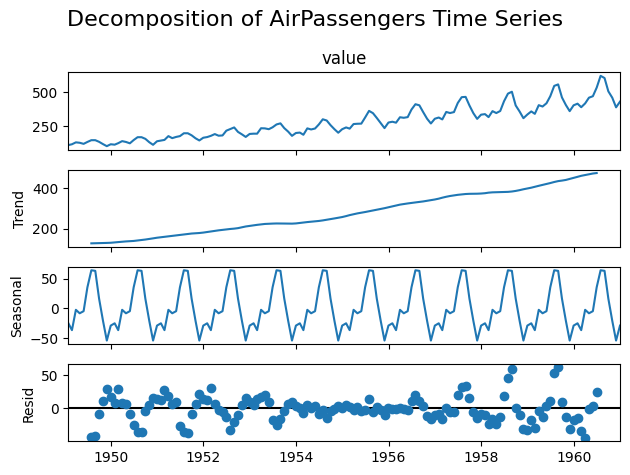

In [9]:
# Question 6: Load a time series dataset (e.g., AirPassengers), plot the original series,
# and decompose it into trend, seasonality, and residual components

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.datasets import get_rdataset

# Load AirPassengers dataset
data = get_rdataset("AirPassengers").data
data['Month'] = pd.date_range(start='1949-01', periods=len(data), freq='M')
data.set_index('Month', inplace=True)

# Decompose
decomposition = seasonal_decompose(data['value'], model='additive', period=12)

# Plot
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.suptitle("Decomposition of AirPassengers Time Series", fontsize=16)
plt.tight_layout()
plt.show()


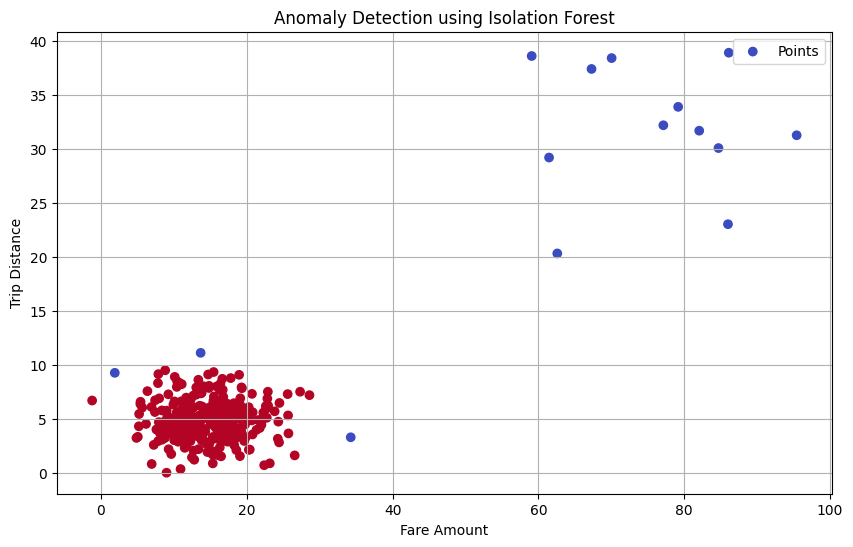

In [10]:
# Question 7: Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare)
# to detect anomalies. Visualize the anomalies on a 2D scatter plot.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Simulate simplified NYC Taxi Fare dataset
np.random.seed(42)
n_samples = 300
fare_amount = np.random.normal(loc=15, scale=5, size=n_samples)
trip_distance = np.random.normal(loc=5, scale=2, size=n_samples)

# Inject anomalies
fare_amount[::25] = np.random.uniform(50, 100, size=n_samples // 25)
trip_distance[::25] = np.random.uniform(20, 40, size=n_samples // 25)

df = pd.DataFrame({'fare_amount': fare_amount, 'trip_distance': trip_distance})

# Isolation Forest
model = IsolationForest(contamination=0.05)
df['anomaly'] = model.fit_predict(df[['fare_amount', 'trip_distance']])

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(df['fare_amount'], df['trip_distance'], c=df['anomaly'], cmap='coolwarm', label='Points')
plt.xlabel('Fare Amount')
plt.ylabel('Trip Distance')
plt.title('Anomaly Detection using Isolation Forest')
plt.legend()
plt.grid(True)
plt.show()


/tmp/ipython-input-11-1046020094.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data['Month'] = pd.date_range(start='1949-01', periods=len(data), freq='M')
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/tmp/ipython-input-11-1046020094.py:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=data.index[-1] + pd.offsets.MonthBegin(), periods=12, freq='M')


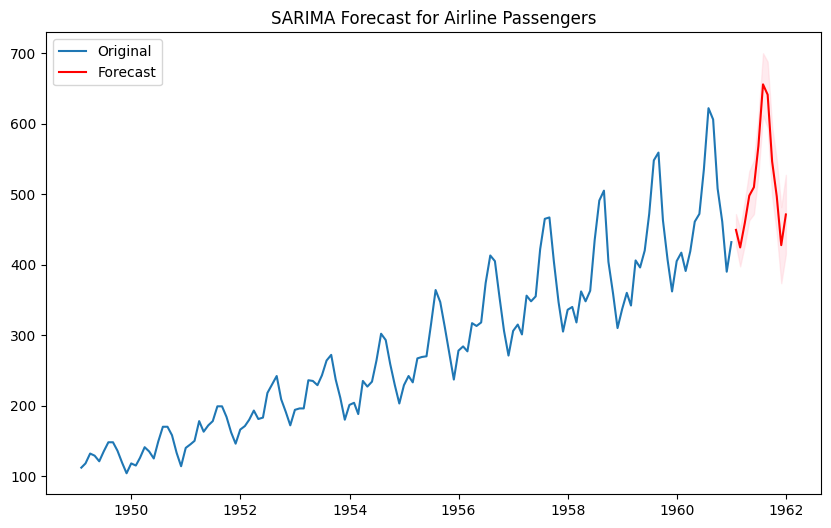

In [11]:
# Question 8: Train a SARIMA model on the monthly airline passengers dataset.
# Forecast the next 12 months and visualize the results.

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.datasets import get_rdataset

# Load dataset
data = get_rdataset("AirPassengers").data
data['Month'] = pd.date_range(start='1949-01', periods=len(data), freq='M')
data.set_index('Month', inplace=True)

# Fit SARIMA model (p=1,d=1,q=1) x (1,1,1,12)
model = SARIMAX(data['value'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit(disp=False)

# Forecast next 12 months
forecast = results.get_forecast(steps=12)
forecast_index = pd.date_range(start=data.index[-1] + pd.offsets.MonthBegin(), periods=12, freq='M')

# Plot
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['value'], label='Original')
plt.plot(forecast_index, forecast.predicted_mean, label='Forecast', color='red')
plt.fill_between(forecast_index,
                 forecast.conf_int().iloc[:, 0],
                 forecast.conf_int().iloc[:, 1],
                 color='pink', alpha=0.3)
plt.title("SARIMA Forecast for Airline Passengers")
plt.legend()
plt.show()


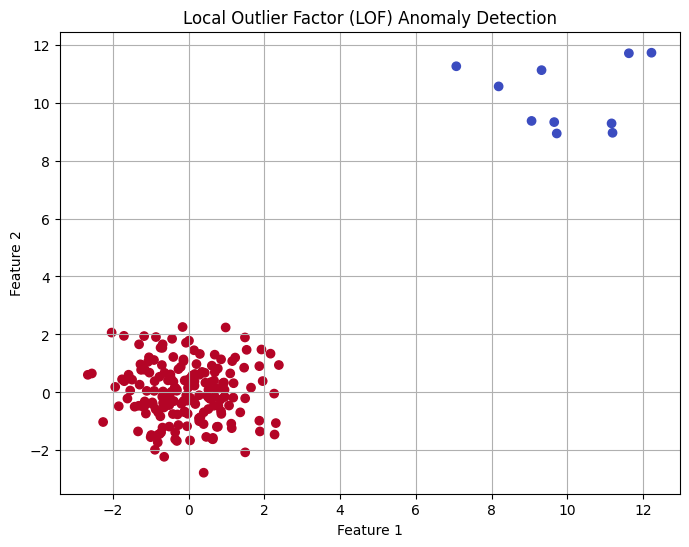

In [12]:
# Question 9: Apply Local Outlier Factor (LOF) on any numerical dataset to detect
# anomalies and visualize them using matplotlib.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# Generate sample numerical dataset
np.random.seed(0)
X = np.random.normal(0, 1, (200, 2))

# Inject anomalies
X[::20] += np.random.normal(10, 1, (10, 2))

# Apply LOF
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
y_pred = lof.fit_predict(X)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='coolwarm')
plt.title('Local Outlier Factor (LOF) Anomaly Detection')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


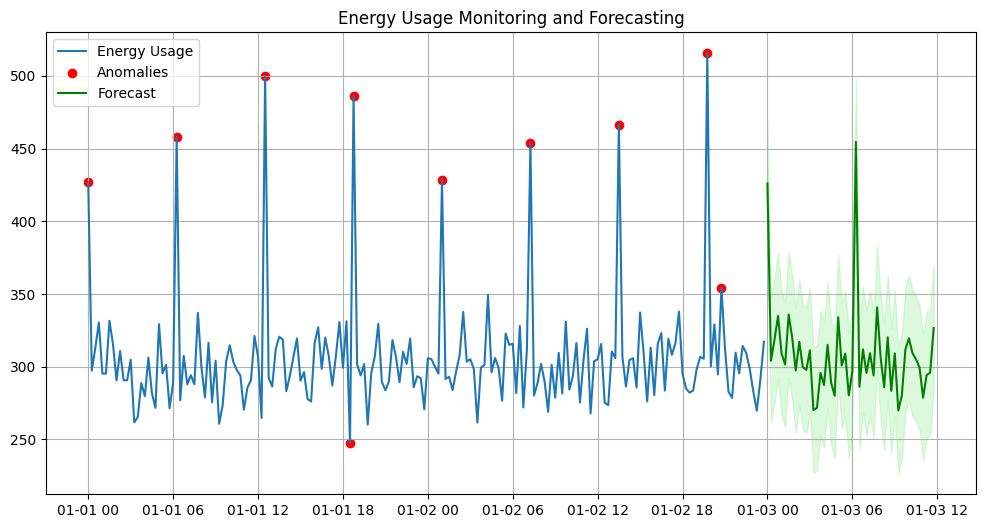

In [13]:
# Question 10: Forecast energy demand and detect abnormal spikes in real-time data.
# Explain workflow with code examples.

import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Simulate real-time 15-min energy usage data (2 days)
np.random.seed(42)
timestamps = pd.date_range('2023-01-01', periods=192, freq='15min')
energy_usage = np.random.normal(loc=300, scale=20, size=192)
energy_usage[::25] += np.random.uniform(100, 200, size=8)  # spikes

df = pd.DataFrame({'timestamp': timestamps, 'energy_usage': energy_usage})
df.set_index('timestamp', inplace=True)

# Anomaly detection using Isolation Forest
model = IsolationForest(contamination=0.05)
df['anomaly'] = model.fit_predict(df[['energy_usage']])

# Forecasting using SARIMA
sarima_model = SARIMAX(df['energy_usage'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 96))
sarima_results = sarima_model.fit(disp=False)
forecast = sarima_results.get_forecast(steps=48)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['energy_usage'], label='Energy Usage')
plt.scatter(df.index[df['anomaly'] == -1], df['energy_usage'][df['anomaly'] == -1], color='red', label='Anomalies')
forecast_index = pd.date_range(df.index[-1] + pd.Timedelta(minutes=15), periods=48, freq='15min')
plt.plot(forecast_index, forecast.predicted_mean, label='Forecast', color='green')
plt.fill_between(forecast_index,
                 forecast.conf_int().iloc[:, 0],
                 forecast.conf_int().iloc[:, 1],
                 alpha=0.3, color='lightgreen')
plt.title("Energy Usage Monitoring and Forecasting")
plt.legend()
plt.grid(True)
plt.show()
